In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv('/content/diabetes.csv')
dataset.head()
dataset.tail()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1
767,93,70,31,0,30.4,0.315,23,0


In [ ]:
dataset.shape

(768, 8)

In [ ]:
dataset.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

outcome 0 means that no diabetes and 1 means that diabetic

In [ ]:
dataset.groupby('Outcome').mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Separating the Data and Leabels

In [ ]:
X = dataset.drop(columns='Outcome', axis=1)
Y = dataset['Outcome']
print(X)

     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763     

In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.84832379  0.14964075  0.90726993 ...  0.20401277  0.46849198
   1.4259954 ]
 [-1.12339636 -0.16054575  0.53090156 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.94372388 -0.26394125 -1.28821221 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.00330087  0.14964075  0.15453319 ... -0.73518964 -0.68519336
  -0.27575966]
 [ 0.1597866  -0.47073225 -1.28821221 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.8730192   0.04624525  0.65635768 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = dataset['Outcome']
print(X)
print(Y)

[[ 0.84832379  0.14964075  0.90726993 ...  0.20401277  0.46849198
   1.4259954 ]
 [-1.12339636 -0.16054575  0.53090156 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.94372388 -0.26394125 -1.28821221 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.00330087  0.14964075  0.15453319 ... -0.73518964 -0.68519336
  -0.27575966]
 [ 0.1597866  -0.47073225 -1.28821221 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.8730192   0.04624525  0.65635768 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train_Test_Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 7) (614, 7) (154, 7)


Training the Model

In [ ]:
classifier = svm.SVC(kernel='linear')


Training support vector machine classifier

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Accuracy_Score_On_Training_data

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy_score_of_training_data: ', training_data_accuracy)

Accuracy_score_of_training_data:  0.7850162866449512


Accuracy_Score_on_Test_Data

In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy_score_of_test_data: ', test_data_accuracy)

Accuracy_score_of_test_data:  0.7662337662337663


Making Prediction On New Data

In [ ]:
# prompt: now write code for making prediction on new data

# New data point
input_data = (5, 166, 72, 19, 175, 25.8, 0.587)

# Changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
standardized_input_data = scaler.transform(input_data_reshaped)

# Predict the output
prediction = classifier.predict(standardized_input_data)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


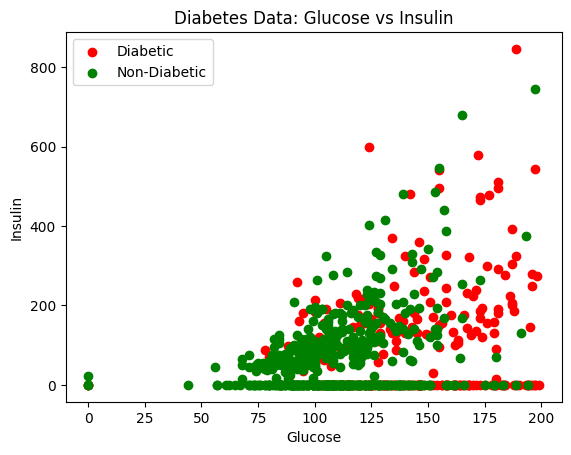

In [ ]:
# prompt: Now Display  data using  plots provided by matplotlib

import matplotlib.pyplot as plt

# Separate the data by outcome
diabetes_yes = dataset[dataset['Outcome'] == 1]
diabetes_no = dataset[dataset['Outcome'] == 0]

# Plot the data for each outcome
plt.scatter(diabetes_yes['Glucose'], diabetes_yes['Insulin'], color='red', label='Diabetic')
plt.scatter(diabetes_no['Glucose'], diabetes_no['Insulin'], color='green', label='Non-Diabetic')

# Add labels and title
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Diabetes Data: Glucose vs Insulin')
plt.legend()

# Show the plot
plt.show()


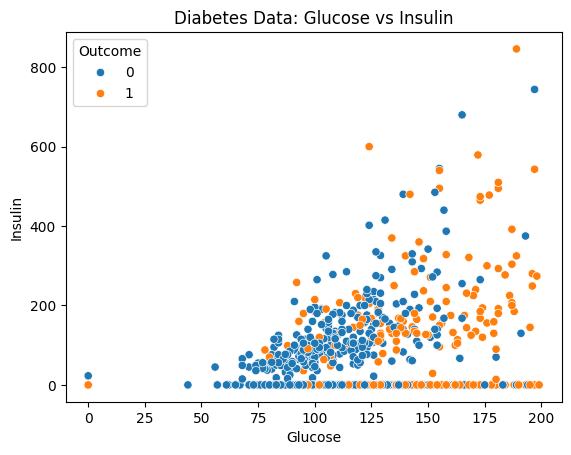

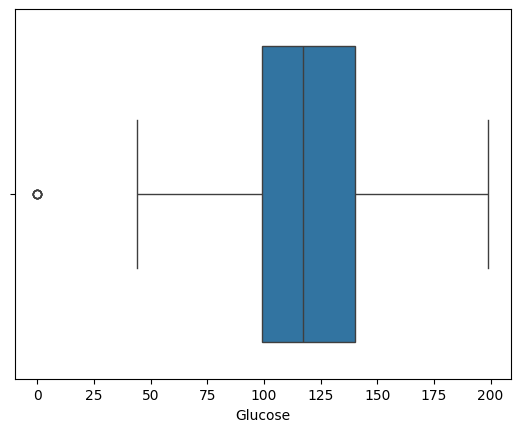

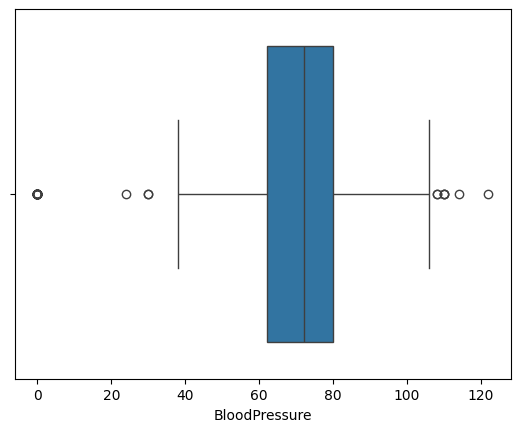

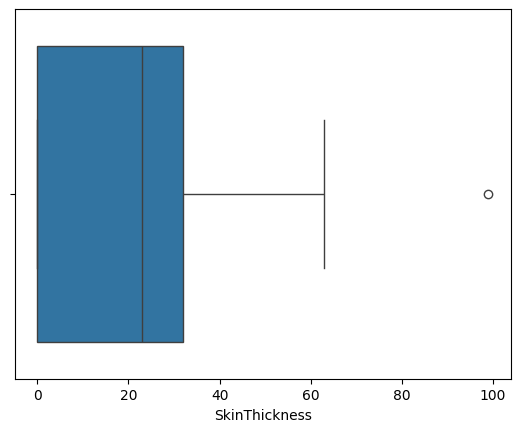

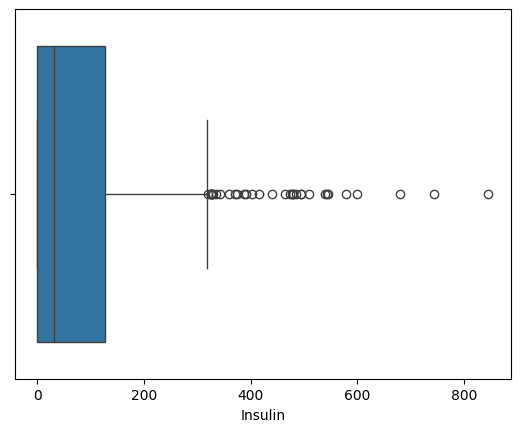

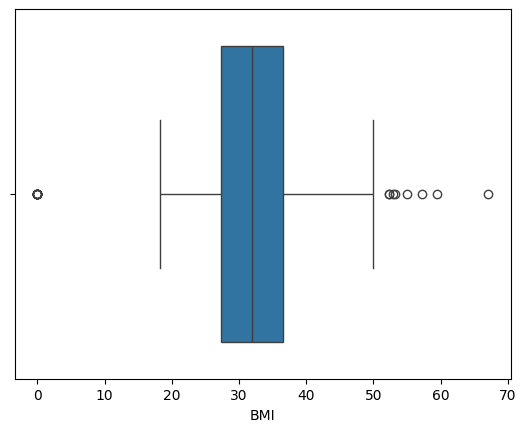

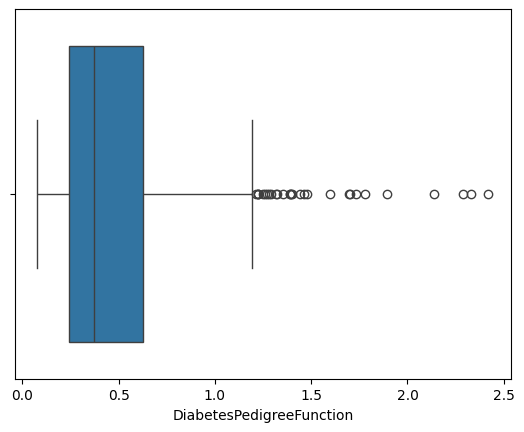

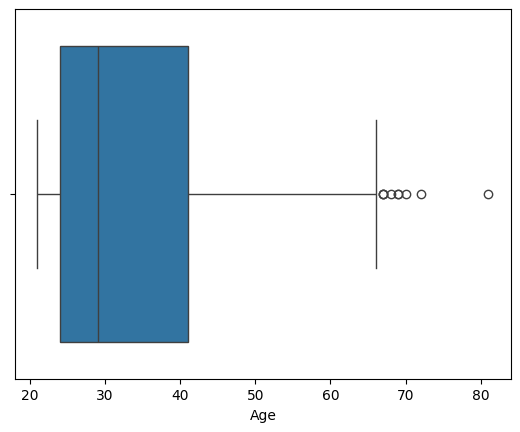

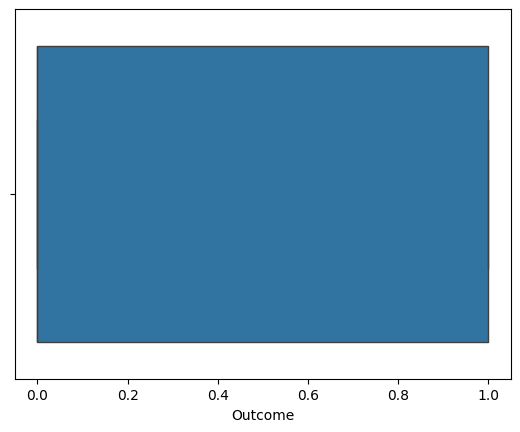

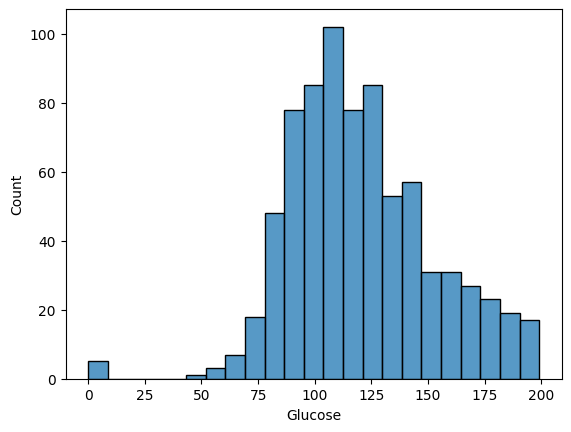

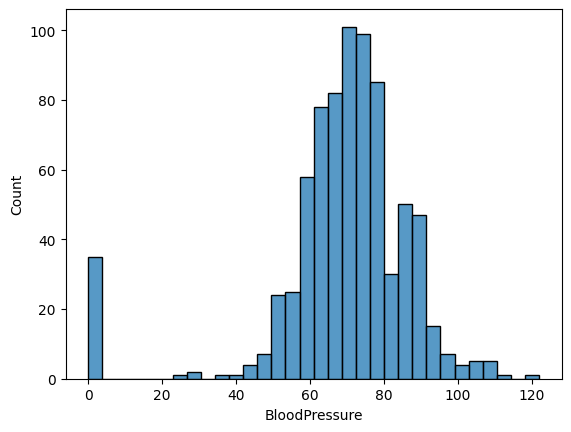

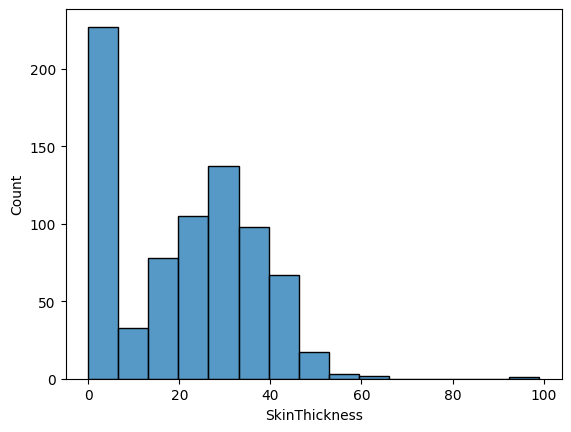

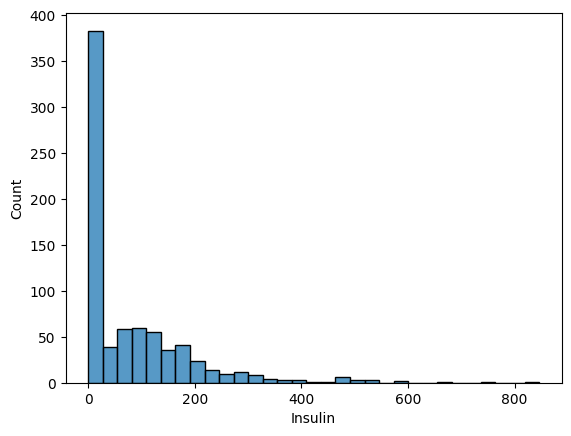

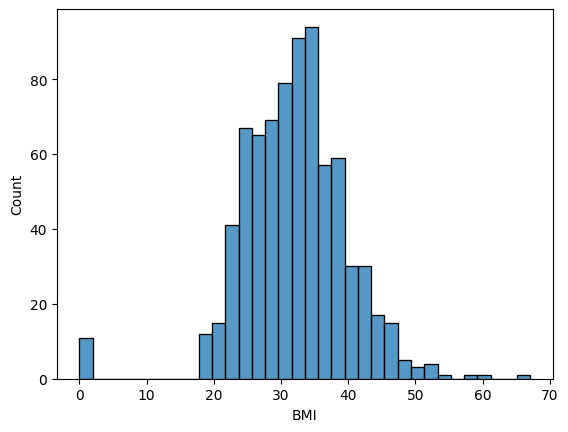

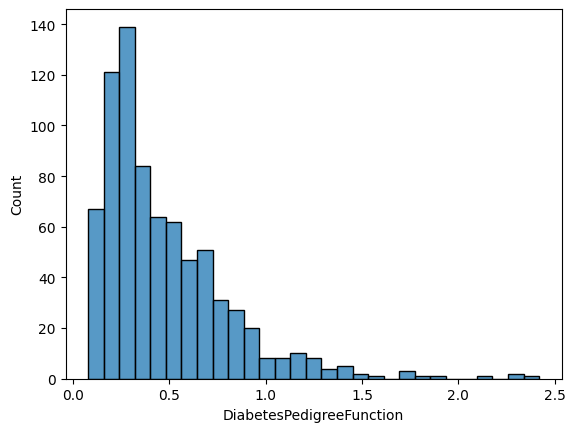

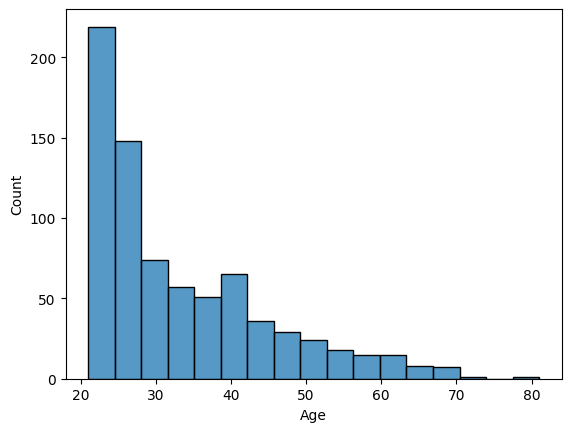

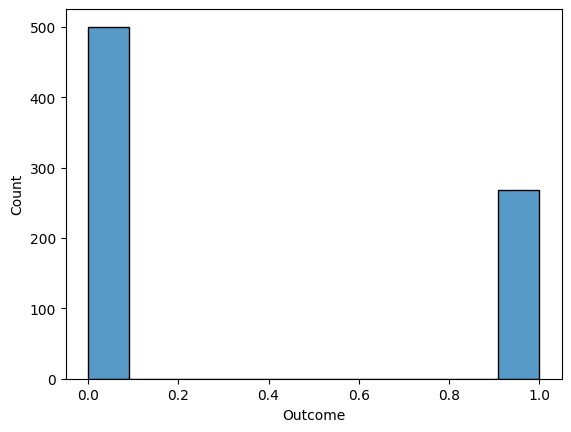

In [ ]:
# prompt: Now Display  data using  plots provided by seaborn library

import seaborn as sns

# Create a scatter plot with Seaborn
sns.scatterplot(x="Glucose", y="Insulin", hue="Outcome", data=dataset)

# Add labels and title
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.title("Diabetes Data: Glucose vs Insulin")

# Show the plot
plt.show()

# Create a boxplot for each feature
for column in dataset.columns:
  sns.boxplot(x=column, data=dataset)
  plt.show()

# Create a histogram for each feature
for column in dataset.columns:
  sns.histplot(x=column, data=dataset)
  plt.show()


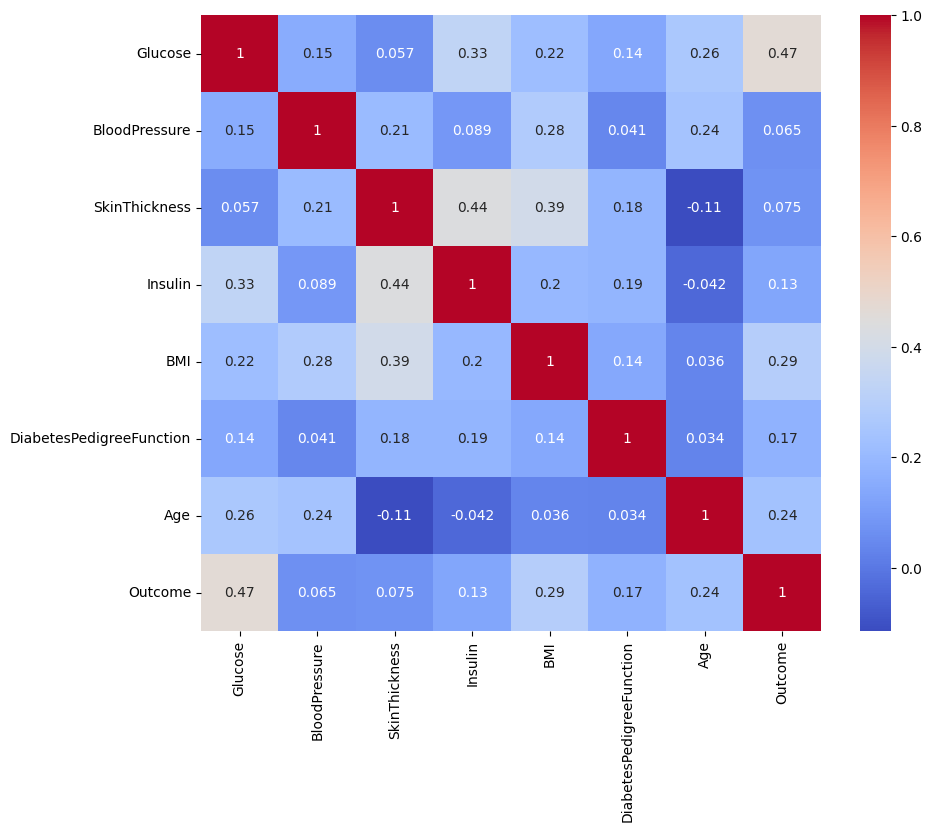

In [ ]:
# prompt: Generate correlation between attributes and display it using heatmap.

plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:

from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# Accuracy_Score_On_Training_data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy_score_of_training_data: ', training_data_accuracy)

# Accuracy_Score_on_Test_Data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy_score_of_test_data: ', test_data_accuracy)


Accuracy_score_of_training_data:  0.7833876221498371
Accuracy_score_of_test_data:  0.7532467532467533
